# Optymalizacja

Poniższy przykład na podstawie książki [IPython Cookbook](https://ipython-books.github.io/92-minimizing-a-mathematical-function/) Cyrilla Rossanta.

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

Zdefiniujemy teraz funkcję celu


In [2]:
def f(x):
    return 1 - np.sin(x) / x

Zobaczmy jak wygląda

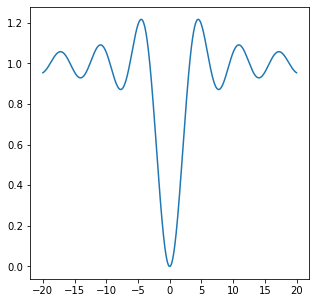

In [3]:
x = np.linspace(-20., 20., 1000)
y = f(x)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y);

Jak widać funkcja w przedstawionym zakresie ma jedno minimum globalne, dwa maksima globalne i szereg lokalnych minimów i maksimów.

Do wysukiwania minumum użyjemy biblioteki [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html)

Funkcja[`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) może używać wielu metod minimalizacji. Żeby funkcja mogła wystartować potrzebuje wartości początkowej. Znajduje minimum w „najbliższej okolicy” wartości startowej, czyli minimum lokalne…

In [4]:
x0 = 3
xmin = opt.minimize(f, x0).x

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=100)
ax.scatter(xmin, f(xmin), marker='v', s=100, zorder=20)
ax.set_xlim(-20, 20);

Niebieska kropka to punkt sartowy, pomarańczowy trójkt to znalezione minimum. Gdy wystartujemy z innego punktu ($x_0=10$) dostaniemy inny wynik.

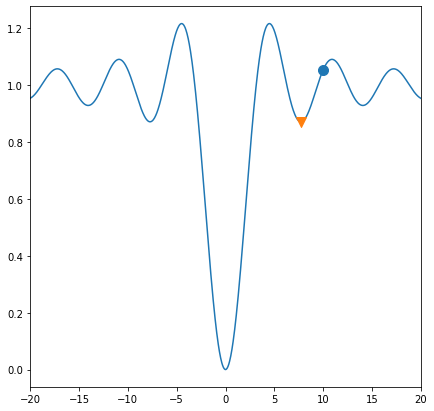

In [6]:
x0 = 10
xmin = opt.minimize(f, x0).x
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=100)
ax.scatter(xmin, f(xmin), marker='v', s=100, zorder=20)
ax.set_xlim(-20, 20);

Znakomita większość iteracyjnych metod optymalizacji wylicza „lokalną” pochodną i porusza się w kierunku, w którym funkcja maleje. Gdy kolejne kroki nie pozwalają poprawić wyniku — procedura konczy pracę sugerując, że znalazło minimum (optimum).

Jedną z metod wyszukiwania optimum globalnego jest, na przykład, losowe zaburzanie punktu startowego lub — po osiągnięciu lokalnego minimum — losowa zmiana współrzędnych i kontynuowanie obliczeń. Użyjemy funkcji [`basinhopping`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html), która tej metody właśnie używa. Zwracam uwagę, że nie zawsze (przy zbyt konserwatywnym wyborze parametrów początkowych) funkcja znajdzie optimum. W tym przypadku przyjęcie zbyt małej liczby iteracji da ten egfekt

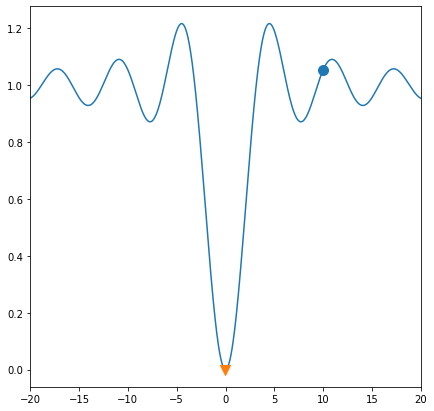

In [7]:
# Wykonamy 1000 iteracji.
x0 = 10
xmin = opt.basinhopping(f, x0, 1000).x
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=100)
ax.scatter(xmin, f(xmin), marker='v', s=100, zorder=20)
ax.set_xlim(-20, 20);

Do optymalizacji możemy użyć innej funkcji [`minimize_scalar`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html), która bez problemu znajduje minimum globalne. Zwraca jedynie uwagę, że $\sin(x)/x$ w okolicach zera jest…

In [8]:
result = opt.minimize_scalar(f)

<ipython-input-2-c29660a14474>:2: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.sin(x) / x


In [9]:
result

     fun: 0.0
    nfev: 57
     nit: 53
 success: True
       x: 1.752157744825158e-08

In [10]:
result.x

1.752157744825158e-08

Funkcji tej, można użyć do znalezienia minimum w przypadku ograniczeń nałożonych na zmienną $x$:


In [11]:
result = opt.minimize_scalar(f, bounds=(1, 10), method='bounded')

In [12]:
result

     fun: 0.871625446474178
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 7.725252932589387

In [13]:
xmin = result.x

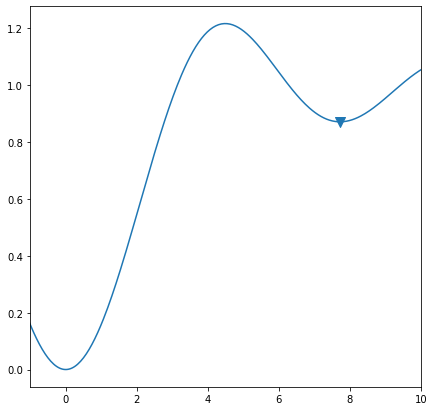

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(x, y)
ax.scatter(xmin, f(xmin), marker='v', s=100, zorder=20)
ax.set_xlim(-1, 10);

JAk widać, znajdowane jest optimum lokalne, a nie globalne znajdujące się na granicy…

In [15]:
xmin = opt.minimize_scalar(f, bounds=(1, 4), method='bounded').x

In [16]:
xmin

1.0000034823730521

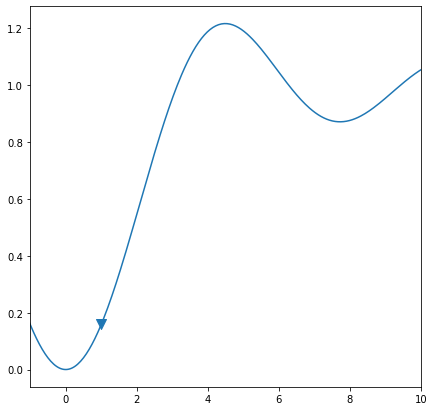

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(x, y)
ax.scatter(xmin, f(xmin), marker='v', s=100, zorder=20)
ax.set_xlim(-1, 10);

Jak widać, teraz jest ciut lepiej…

**Tak na marginesie** Funkcja `minimize_scalar` może być użyto do poszukiwania minimum metodą złotego podziału (sugerowaną w [Instrukcji Laboratoryjnej 5](https://kmim.wm.pwr.edu.pl/myszka/dydaktyka/metody-numeryczne/instrukcje-laboratoryjne/laboratorium-5/)).

## Funkcja dwu zmiennych

Funkcja `minimize` moze być użyta również do funkicji wielowymiarowych (jak sama nazwa wskazuje w przypadku funkcji `minimize_scalar` nie będzie to możliwe).

Minimalizowana funkcja dwu zmiennych ma postać:
$$
f(x,y)=\sin^2(3\pi x) + (x-1)^2(1+\sin^2(3\pi y))+(y-1)^2(1+\sin^2(2\pi y))
$$
Poniżej definicja funkcji

In [18]:
def g(X):
    # X is a 2*N matrix, each column contains
    # x and y coordinates.
    x, y = X
    return (np.sin(3*np.pi*x)**2 + 
            (x-1)**2 * (1 + np.sin(3*np.pi*y)**2) +
            (y-1)**2 * (1 + np.sin(2*np.pi*y)**2))

Ogólnie funkcja nie jest łatwa do optymalizacji, ale jest często używana w różnych [benczmarkach optymalizacyjnych](https://en.wikipedia.org/wiki/Test_functions_for_optimization). Minimum przyjmuje w punkcie o współrzędnych $(1,1)$.

Jej „poziomice” wyglądają jakoś tak (użyto skali logarytmicznej do odwzorowania wartości kolorami):

In [24]:
n = 500
k = 10
X, Y = np.mgrid[-k:k:n * 1j,-k:k:n * 1j]
Z = g(np.vstack((X.ravel(), Y.ravel()))).reshape(n, n)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
# We use a logarithmic scale for the color here.
ax.imshow(np.log(Z), cmap=plt.cm.hot_r, extent=(-k, k, -k, k), origin='lower')
ax.set_axis_off()

Do minimalizacji zaproponowano [metodę Powella](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-powell.html). `(8, 3)` to współrzędne punktu startowego.

In [25]:
# We use the Powell method.
x0, y0 = opt.minimize(g, (8, 3), method='Powell').x
x0, y0

(1.0, 1.0000000000000004)

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(np.log(Z), cmap=plt.cm.hot_r, extent=(-k, k, -k, k), origin='lower')
ax.scatter(x0, y0, s=100)
ax.set_axis_off()